# Recurrent Neural Network Video MNIST Lab

By the end of this lab you will have

- Defined and trained a recurrent neural network with keras to perform video frame prediction with `batch_size=1`
- Defined and trained a recurrent neural network with keras to perform video frame prediction with `batch_size=100`
- Evaluated hyperparameters with a validation set
- Defined and trained a recurrent neural network with keras to perform **accurate** video frame prediction

Let's get started!

The mnist video dataset is courtesty of github user [despoisj](https://github.com/despoisj) and his/her [LatentSpaceVisualization]( https://github.com/despoisj/LatentSpaceVisualization) project.

---

# Load Data

The following code loads in the mnist video dataset and displays the first ten samples.

4


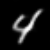

4


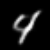

4


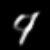

7


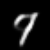

7


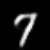

7


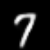

7


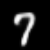

7


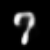

7


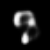

5


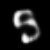

In [1]:
from IPython.display import display
import pickle

[imgs, y] = pickle.load(open('LatentSpaceVisualization/Visuals/mnist_transitions.p', 'rb'))
for img, y_ in zip(imgs[:10], y[:10]):
    print(y_)
    display(img)

# Flatten Images

The following code resizes each image to `(28, 28)` and normalizes the pixel intensities and converts `y` to a categorical representation.

In [2]:
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.utils.np_utils import to_categorical

imgs = [img.resize(size=[28, 28]) for img in imgs]
X = np.array([img_to_array(img).flatten() for img in imgs]) / 255.
Y = to_categorical(y)

X.shape, Y.shape

Using TensorFlow backend.


((6000, 784), (6000, 10))

# keras RNNs with `batch_size=1`

## Question

- What shape do you need to convert `X` to to make it compatible a with `SimpleRNN(..., batch_input_shape=[1, 6000, 784])` layer?

## Hints

- This is the most quick-and-dirty way to make `X` and `Y` compatible with a keras recurrent layer

## Answer

- `(1, 6000, 784)`

## Question

- How about `Y`?

## Hint

- The shape for the transformed `Y` is identical to the shape for the transformed `X` but for one dimension

## Answer

- `(1, 6000, 10)`

## Tasks

- Reshape `X` and `Y` and save them into new variables call `X1` and `Y1` respectively which satisfy the above requirement

In [3]:
X1 = X.reshape(1, 6000, 784)
Y1 = Y.reshape(1, 6000, 10)

Y1.shape, X1.shape

((1, 6000, 10), (1, 6000, 784))

## Task

- Define a keras RNN model compatible with `X1` and `Y1`

## Requirement

- You must specify

```python
SimpleRNN(..., return_sequences=True, batch_input_shape=[1, 6000, 784])
```

as the first layer in your architecture.

In [4]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=10, activation='softmax', return_sequences=True, batch_input_shape=[1, 6000, 784]))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (1, 6000, 10)             7950      
Total params: 7,950.0
Trainable params: 7,950
Non-trainable params: 0.0
_________________________________________________________________


## Task

- Fit your RNN model on `X1` and `Y1`

## Requirements

- Fit your model with `model.fit(..., batch_size=1, shuffle=False, epochs=50)`

In [5]:
model.fit(X1, Y1, batch_size=1, shuffle=False, epochs=50)

Epoch 1/50
1/1 [==============================] - 3s - loss: 2.4702 - acc: 0.0630
Epoch 2/50
1/1 [==============================] - 2s - loss: 2.4216 - acc: 0.0725
Epoch 3/50
1/1 [==============================] - 2s - loss: 2.3768 - acc: 0.0830
Epoch 4/50
1/1 [==============================] - 2s - loss: 2.3354 - acc: 0.1020
Epoch 5/50
1/1 [==============================] - 2s - loss: 2.2990 - acc: 0.1295
Epoch 6/50
1/1 [==============================] - 2s - loss: 2.2624 - acc: 0.1518
Epoch 7/50
1/1 [==============================] - 2s - loss: 2.2287 - acc: 0.1807
Epoch 8/50
1/1 [==============================] - 2s - loss: 2.1952 - acc: 0.2087
Epoch 9/50
1/1 [==============================] - 2s - loss: 2.1629 - acc: 0.2382
Epoch 10/50
1/1 [==============================] - 2s - loss: 2.1317 - acc: 0.2603
Epoch 11/50
1/1 [==============================] - 2s - loss: 2.1011 - acc: 0.2748
Epoch 12/50
1/1 [==============================] - 2s - loss: 2.0711 - acc: 0.2925
Epoch 13/50
1

## Question

- List two downsides of using `model.fit(..., batch_size=1)` as opposed to `model.fit(..., batch_size=m)` where $m > 1$.

## Answer

- The gradient is noisier
- Training takes many more epochs to minimize loss

---

# keras RNNs with `batch_size=100`

## Question

- What shape do you need to convert `X` to to make it compatible a with `SimpleRNN(..., batch_input_shape=[100, 60, 784])` layer?

## Constraints

- One batch must complete an entire epoch

## Hints

- A batch size of `100` means we effectively have `100` copies of our RNN each of which are being simulaneously unrolled on their respective portions of the original input sequence
- The answer will be of shape `(batch_size, timesteps, 784)`

## Answer

- `(100, 60, 784)`

## Task

- Reshape `X` and `Y` and save them into new variables call `X100` and `Y100` respectively which satisfy the above requirement

## Requirements

- There must be no overlap between batches (i.e. each image can only appear in a single batch

## Hint

- The simplest way to achieve this is to split `X` into `100` different chunks with `numpy.split()`

In [6]:
X100, Y100 = np.array(np.split(X, 100)), np.array(np.split(Y, 100))

## Task

- Define a RNN model compatible with `X100` and `Y100`

## Requirement

- You must specify

```python
SimpleRNN(..., return_sequences=True, batch_input_shape=[100, 60, 784])
```

as the first layer in your architecture.

In [7]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=10, activation='softmax', return_sequences=True, batch_input_shape=[100, 60, 784]))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (100, 60, 10)             7950      
Total params: 7,950.0
Trainable params: 7,950
Non-trainable params: 0.0
_________________________________________________________________


## Task

- Fit Your RNN Model on `X100` and `Y100`

## Requirements

- Run your model for `model.fit(..., batch_size=100, epochs=50)`

In [8]:
model.fit(X100, Y100, batch_size=100, epochs=50)

Epoch 1/50
100/100 [==============================] - 0s - loss: 2.3688 - acc: 0.0763
Epoch 2/50
100/100 [==============================] - 0s - loss: 2.3218 - acc: 0.0938
Epoch 3/50
100/100 [==============================] - 0s - loss: 2.2780 - acc: 0.1273
Epoch 4/50
100/100 [==============================] - 0s - loss: 2.2369 - acc: 0.1697
Epoch 5/50
100/100 [==============================] - 0s - loss: 2.1984 - acc: 0.2152
Epoch 6/50
100/100 [==============================] - 0s - loss: 2.1621 - acc: 0.2478
Epoch 7/50
100/100 [==============================] - 0s - loss: 2.1276 - acc: 0.2750
Epoch 8/50
100/100 [==============================] - 0s - loss: 2.0946 - acc: 0.2983
Epoch 9/50
100/100 [==============================] - 0s - loss: 2.0629 - acc: 0.3230
Epoch 10/50
100/100 [==============================] - 0s - loss: 2.0323 - acc: 0.3448
Epoch 11/50
100/100 [==============================] - 0s - loss: 2.0025 - acc: 0.3623
Epoch 12/50
100/100 [==============================]

## Question

- Describe the differences you see when optimizing on `(X100, Y100)` as opposed to `(X1, Y1)`.

## Answer

- Training is much faster

## Task

- Split up `X100` and `Y100` into variables `(X_train50, Y_train50)` and `(X_val50, Y_val50)` and re-fit your model with this validation data

## Hints

- `X_train50` and `Y_train50` have shape `(50, 60, 784)` and `(50, 60, 10)` respectively. Their validation counterparts follow similarly.

In [9]:
[X_train50, Y_train50], [X_val50, Y_val50] = (X100[:50], Y100[:50]), (X100[50:], Y100[50:])

## Task

- Modify your keras model to make it compatible with `(X_train50, Y_train50)` and `(X_val50, Y_val50)`

## Hints

- Re-instantiate your model with `SimpleRNN(..., batch_input_shape=[50, 60, 784])`

In [10]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=10, activation='softmax', return_sequences=True, batch_input_shape=[50, 60, 784]))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (50, 60, 10)              7950      
Total params: 7,950.0
Trainable params: 7,950
Non-trainable params: 0.0
_________________________________________________________________


## Question

- Why did we choose `50` for our new batch size?

## Answer

- The train and validation sets need to have the same number of samples because the batch size is hard-coded into the definition of the architecture

## Task

- Refit your model with `(X_train50, Y_train50)` and `(X_val50, Y_val50)`

## Hints

- Make sure to call `model.fit(..., batch_size=50)`

In [11]:
model.fit(X_train50, Y_train50, validation_data=(X_val50, Y_val50), batch_size=50, epochs=50)

Train on 50 samples, validate on 50 samples
Epoch 1/50
50/50 [==============================] - 0s - loss: 2.4069 - acc: 0.0840 - val_loss: 2.3304 - val_acc: 0.1083
Epoch 2/50
50/50 [==============================] - 0s - loss: 2.3490 - acc: 0.0933 - val_loss: 2.2891 - val_acc: 0.1220
Epoch 3/50
50/50 [==============================] - 0s - loss: 2.2958 - acc: 0.1130 - val_loss: 2.2514 - val_acc: 0.1497
Epoch 4/50
50/50 [==============================] - 0s - loss: 2.2471 - acc: 0.1390 - val_loss: 2.2188 - val_acc: 0.1830
Epoch 5/50
50/50 [==============================] - 0s - loss: 2.2050 - acc: 0.1830 - val_loss: 2.1879 - val_acc: 0.2163
Epoch 6/50
50/50 [==============================] - 0s - loss: 2.1654 - acc: 0.2240 - val_loss: 2.1578 - val_acc: 0.2400
Epoch 7/50
50/50 [==============================] - 0s - loss: 2.1271 - acc: 0.2680 - val_loss: 2.1293 - val_acc: 0.2547
Epoch 8/50
50/50 [==============================] - 0s - loss: 2.0914 - acc: 0.2900 - val_loss: 2.1021 - val_

## Task

- Design and optimize a recurrent neural network to maximize validation accuracy on `(X_val50, Y_val50)`

## Hints

- Stack multiple recurrent layers
- Use a convolutional layer between the recurrent layers and the image

## Requirements

- The only recurrent layer you can use is SimpleRNN

# Bonus Activities

- Use more than one batch per epoch with keras stateful RNNs
- Use overlapping windows instead of disjoint windows in each batch
- Monitor gradients during training with tensorboard